In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Defensive Rankings from ProFootballReference
#(https://www.pro-football-reference.com/years/2021/opp.htm)
D_data ={}
overall_data = pd.DataFrame([])

for i in np.arange(1970, 2022):
    D_data[i] = pd.read_excel('Defense_Rankings.xlsx', str(i), header=[1])
    D_data[i]['Season'] = i
    overall_data = pd.concat([overall_data, D_data[i]])    
    Def = overall_data.copy()
    Def.rename(columns = {'Rk':'Def_Rk','G': 'Games', 'PA': 'Points_Allowed', 'Yds':'Tot_Yards', 
                          'Ply':'Tot_Plays', 'Y/P': 'Tot_Yards/Play', 'TO':'Takeaways', 
                          '1stD':'Tot_First_Downs', 'Cmp':'Pass_Completed', 'Att': 'Pass_Attempted',
                          'Yds.1': 'Pass_Yards', 'TD':'Pass_TD', 'NY/A':'Pass_Net/Attempt', 
                          '1stD.1':'Pass_First_Downs', 'Att.1': 'Rush_Attempted', 'Yds.2': 'Rush_Yards',
                          'Yds.2':'Rush_Yards', 'TD.1':'Rush_TD', 'Y/A': 'Rush_Yds/Attempt', 
                          '1stD.2':'Rush_First_Downs', 'Pen':'Penalities','Yds.3':'Penalty_Yards',
                          '1stPy':'First_Down_By_Penalty', 'Sc%': 'Scoring_Percentage', 
                          'TO%':'Turnover_Percentage', 'Tm':'Team'}, inplace=True)
    Def.dropna(subset=['Games'], inplace=True)
    Def = Def.reset_index(drop=True)
    
    
#Offensive Rankings from ProFootballReference 
#(https://www.pro-football-reference.com/years/2021/index.htm)    
O_data = {}
overall_data1 = pd.DataFrame([])

for i in np.arange(1970, 2022):
    O_data[i] = pd.read_excel('Offense_Rankings.xlsx', str(i), header=[1])
    O_data[i]['Season'] = i
    overall_data1 = pd.concat([overall_data1, O_data[i]])
    Off = overall_data1.copy()
    Off.rename(columns = {'Rk':'Off_Rk', 'G': 'Games', 'PF': 'Points_For', 'Yds':'Tot_Yards', 
                          'Ply':'Tot_Plays', 'Y/P': 'Tot_Yards/Play', 'TO':'Turnover', 
                          '1stD':'Tot_First_Downs', 'Cmp':'Pass_Completed', 'Att': 'Pass_Attempted',
                          'Yds.1': 'Pass_Yards', 'TD':'Pass_TD', 'NY/A':'Pass_Net/Attempt',
                          '1stD.1':'Pass_First_Downs', 'Att.1': 'Rush_Attempted', 'Yds.2': 'Rush_Yards',
                          'Yds.2':'Rush_Yards', 'TD.1':'Rush_TD', 'Y/A': 'Rush_Yds/Attempt',
                          '1stD.2':'Rush_First_Downs', 'Pen':'Penalities','Yds.3':'Penalty_Yards',
                          '1stPy':'First_Down_By_Penalty', 'Sc%': 'Scoring_Percentage', 
                          'TO%':'Turnover_Percentage', 'Tm':'Team'}, inplace=True)
    Off.dropna(subset=['Games'], inplace=True)
    Off = Off.reset_index(drop=True)

In [3]:
#Merging Offense and Defense Dataframes together
Off = Off.drop(['FL','EXP'], axis=1)
Def = Def.drop(['FL','EXP'], axis=1)

Team = pd.merge(Def, Off, how='inner', on=['Season','Team','Games'], suffixes= ('_def', '_off'))
Team.head(5)

,Def_Rk,Team,Games,Points_Allowed,Tot_Yards_def,Tot_Plays_def,Tot_Yards/Play_def,Takeaways,Tot_First_Downs_def,Pass_Completed_def,...,Rush_Attempted_off,Rush_Yards_off,Rush_TD_off,Rush_Yds/Attempt_off,Rush_First_Downs_off,Penalities_off,Penalty_Yards_off,First_Down_By_Penalty_off,Scoring_Percentage_off,Turnover_Percentage_off
0,1.0,Minnesota Vikings,14.0,143.0,2803.0,814.0,3.4,44.0,168.0,195.0,...,508.0,1634.0,16.0,3.2,98.0,60.0,631.0,16.0,NaN,NaN
1,2.0,Detroit Lions,14.0,202.0,3448.0,756.0,4.6,44.0,186.0,194.0,...,514.0,2127.0,16.0,4.1,113.0,58.0,659.0,23.0,NaN,NaN
2,3.0,Los Angeles Rams,14.0,202.0,3548.0,826.0,4.3,35.0,195.0,196.0,...,430.0,1763.0,12.0,4.1,93.0,88.0,959.0,11.0,NaN,NaN
3,4.0,Dallas Cowboys,14.0,221.0,3569.0,855.0,4.2,39.0,205.0,193.0,...,522.0,2300.0,16.0,4.4,119.0,87.0,934.0,15.0,NaN,NaN
4,5.0,St. Louis Cardinals,14.0,228.0,3869.0,894.0,4.3,35.0,242.0,183.0,...,429.0,1998.0,18.0,4.7,110.0,84.0,896.0,12.0,NaN,NaN


In [4]:
#Super Bowl teams/qbs from Wikipedia (https://en.wikipedia.org/wiki/List_of_Super_Bowl_starting_quarterbacks)
SB = pd.read_csv('SuperBowlQBs.csv')

#Removing pre-1970 SB (before 1970 NFL merger)
SB.drop(SB.loc[0:3].index, inplace=True)
SB.drop(columns=['Super Bowl'], inplace=True)
SB.rename(columns={'Team.1':'Losing_Team', 'Winning QB': 'SBWin_QB', 'Team':'Win_Team',
                   'Losing QB': 'SBLosing_QB'}, inplace=True)

#Removing miscellaneous characters
SB['Win_Team'] = SB['Win_Team'].map(lambda x: str(x)[:-1])
SB['Losing_Team'] = SB['Losing_Team'].map(lambda x: str(x)[:-1])
SB['SBWin_QB'] = SB['SBWin_QB'].str.strip('*MVP‡') 
SB['SBLosing_QB'] = SB['SBLosing_QB'].str.strip('*‡')

# Changing QB isspellings
SB.loc[SB.SBWin_QB == 'eyton Manning', 'SBWin_QB'] = 'Peyton Manning'
SB.loc[SB.SBWin_QB == 'atrick Mahomes', 'SBWin_QB'] = 'Patrick Mahomes'
SB.loc[SB.SBWin_QB == 'atthew Stafford', 'SBWin_QB'] = 'Matthew Stafford'
SB.loc[SB.SBWin_QB == 'hil Simms', 'SBWin_QB'] = 'Phil Simms'
SB.loc[SB.SBWin_QB == 'ark Rypien', 'SBWin_QB'] = 'Mark Rypien'

#Preparing to merge SBWin_QB & SB_LoseQB with Team dataframeJupyter notebooks or web applications using Dash or saved as individual
SBWinners = SB[['Season', 'SBWin_QB', 'Win_Team']]
SBWinners = SBWinners.rename(columns= {'Win_Team' : 'Team'})

SBLosers = SB[['Season', 'SBLosing_QB', 'Losing_Team']]
SBLosers = SBLosers.rename(columns= {'Losing_Team' : 'Team'})

#Merging both dfs to Team dataframe
SBWinners['Season'] = SBWinners['Season'].astype(int)
SBLosers['Season'] = SBLosers['Season'].astype(int)
Team = pd.merge(Team, SBWinners, how='left', on=['Season','Team'])
Team = pd.merge(Team, SBLosers, how='left', on=['Season','Team'])

Team.head(5)

,Def_Rk,Team,Games,Points_Allowed,Tot_Yards_def,Tot_Plays_def,Tot_Yards/Play_def,Takeaways,Tot_First_Downs_def,Pass_Completed_def,...,Rush_TD_off,Rush_Yds/Attempt_off,Rush_First_Downs_off,Penalities_off,Penalty_Yards_off,First_Down_By_Penalty_off,Scoring_Percentage_off,Turnover_Percentage_off,SBWin_QB,SBLosing_QB
0,1.0,Minnesota Vikings,14.0,143.0,2803.0,814.0,3.4,44.0,168.0,195.0,...,16.0,3.2,98.0,60.0,631.0,16.0,NaN,NaN,NaN,NaN
1,2.0,Detroit Lions,14.0,202.0,3448.0,756.0,4.6,44.0,186.0,194.0,...,16.0,4.1,113.0,58.0,659.0,23.0,NaN,NaN,NaN,NaN
2,3.0,Los Angeles Rams,14.0,202.0,3548.0,826.0,4.3,35.0,195.0,196.0,...,12.0,4.1,93.0,88.0,959.0,11.0,NaN,NaN,NaN,NaN
3,4.0,Dallas Cowboys,14.0,221.0,3569.0,855.0,4.2,39.0,205.0,193.0,...,16.0,4.4,119.0,87.0,934.0,15.0,NaN,NaN,NaN,Craig Morton
4,5.0,St. Louis Cardinals,14.0,228.0,3869.0,894.0,4.3,35.0,242.0,183.0,...,18.0,4.7,110.0,84.0,896.0,12.0,NaN,NaN,NaN,NaN


In [5]:
#Comparing off & def rankings of superbowl teams
sbwinlose = Team[(Team['SBWin_QB'].notnull()) | (Team['SBLosing_QB'].notnull())][['Team', 'Season','Def_Rk', 'Off_Rk', 'SBWin_QB', 'SBLosing_QB']]

#average defensive & offensive rankings for sb teams 
avg_off_rank = round(sbwinlose['Off_Rk'].mean(), 2)
avg_def_rank = round(sbwinlose['Def_Rk'].mean(), 2)

#average defensive & offensive rankings for sb winners
sbwin_off_rank = round(sbwinlose.loc[sbwinlose['SBWin_QB'].notnull()]['Off_Rk'].mean(),2)
sbwin_def_rank = round(sbwinlose.loc[sbwinlose['SBWin_QB'].notnull()]['Def_Rk'].mean(),2)

#average defensive & offensive rankings for sb losers 
sblosers_off_rank = round(sbwinlose.loc[sbwinlose['SBLosing_QB'].notnull()]['Off_Rk'].mean(),2)
sblosers_def_rank = round(sbwinlose.loc[sbwinlose['SBLosing_QB'].notnull()]['Def_Rk'].mean(),2)

#calculating differences of winner vs loser rankings
off_diff = -(round(sbwin_off_rank - sblosers_off_rank,2))
def_diff = -(round(sbwin_def_rank - sblosers_def_rank,2)) 

sbwinlose.head(5)

,Team,Season,Def_Rk,Off_Rk,SBWin_QB,SBLosing_QB
3,Dallas Cowboys,1970,4.0,10.0,NaN,Craig Morton
6,Baltimore Colts,1970,7.0,6.0,Johnny Unitas,NaN
28,Miami Dolphins,1971,3.0,4.0,NaN,Bob Griese
32,Dallas Cowboys,1971,7.0,1.0,Roger Staubach,NaN
52,Miami Dolphins,1972,1.0,1.0,Bob Griese,NaN


In [6]:
print(f' Average Offensive Rank of Super Bowl Teams: {avg_off_rank}')
print(f' Average Defensive Rank of Super Bowl Teams: {avg_def_rank}')
print(f'-------------------------------------------------------------')
print(f' Super Bowl Winner Offensive Rank: {sbwin_off_rank}')
print(f' Super Bowl Winner Defensive Rank: {sbwin_def_rank}')
print(f'-------------------------------------------------------------')
print(f' Super Bowl Loser Average Offensive Rank: {sblosers_off_rank}')
print(f' Super Bowl Loser Average Defensive Rank: {sblosers_def_rank}')
print(f'-------------------------------------------------------------')
print(f' Winner - Loser Difference of Offensive Ranking: {off_diff}')
print(f' Winner - Loser Difference of Defensive Ranking: {def_diff}')
print(f' Negative values indicate the Super Bowl winner has a worse ranking')

 Average Offensive Rank of Super Bowl Teams: 5.64
 Average Defensive Rank of Super Bowl Teams: 7.1
-------------------------------------------------------------
 Super Bowl Winner Offensive Rank: 5.88
 Super Bowl Winner Defensive Rank: 5.81
-------------------------------------------------------------
 Super Bowl Loser Average Offensive Rank: 5.4
 Super Bowl Loser Average Defensive Rank: 8.38
-------------------------------------------------------------
 Winner - Loser Difference of Offensive Ranking: -0.48
 Winner - Loser Difference of Defensive Ranking: 2.57
 Negative values indicate the Super Bowl winner has a worse ranking


In [7]:
# Creating function to determine avg team rankings of super bowl quarterbacks
def avg_rankings(qb):
    qb= str(qb)
    a = sbwinlose[(sbwinlose['SBWin_QB'] == qb) | (sbwinlose['SBLosing_QB'] == qb)]
    defrank = round(a['Def_Rk'].mean(), 2)
    offrank = round(a['Off_Rk'].mean(), 2)
    sbs = len(a)
    print(qb)
    print(f'{sbs} Super Bowl appearances')
    print(f"{qb}'s average team Super Bowl defensive rank is: {defrank}")
    print(f"{qb}'s average team Super Bowl offensive rank is: {offrank}")
    print('------------------------------------------------------------')
    print('                                                            ')

In [8]:
# Filtering superbowl quarterbacks to only quarterbacks that have appeared in 2 or more superbowls
sbappearances = sbwinlose[['SBWin_QB', 'SBLosing_QB']].stack().value_counts().loc[lambda x: x>=2].to_frame()

sbappearances.head(5)

,0
Tom Brady,10
John Elway,5
Roger Staubach,4
Terry Bradshaw,4
Peyton Manning,4


In [9]:
# average rankings of each
for i in sbappearances.index:
    avg_rankings(i)

Tom Brady
10 Super Bowl appearances
Tom Brady's average team Super Bowl defensive rank is: 5.8
Tom Brady's average team Super Bowl offensive rank is: 4.2
------------------------------------------------------------
                                                            
John Elway
5 Super Bowl appearances
John Elway's average team Super Bowl defensive rank is: 7.6
John Elway's average team Super Bowl offensive rank is: 4.4
------------------------------------------------------------
                                                            
Roger Staubach
4 Super Bowl appearances
Roger Staubach's average team Super Bowl defensive rank is: 6.75
Roger Staubach's average team Super Bowl offensive rank is: 3.0
------------------------------------------------------------
                                                            
Terry Bradshaw
4 Super Bowl appearances
Terry Bradshaw's average team Super Bowl defensive rank is: 2.5
Terry Bradshaw's average team Super Bowl offensive 

In [10]:
#Creating QB dataframe with win/loss count
a = pd.DataFrame(Team['SBWin_QB'].value_counts())
a = a.reset_index().rename(columns= {'index':'QB'})

b = pd.DataFrame(Team['SBLosing_QB'].value_counts())
b = b.reset_index().rename(columns= {'index':'QB'})

#Merging win and losses
c = pd.merge(a, b, on='QB', how='outer')
c = c.fillna(0)

#Creating total SB and calculating winning percent
c['Total_SB'] = c['SBWin_QB'] + c['SBLosing_QB']
c['SBWin%'] = round((c['SBWin_QB']/c['Total_SB'])*100,0)
SBQB = c.copy()
SBQB.head(5)

,QB,SBWin_QB,SBLosing_QB,Total_SB,SBWin%
0,Tom Brady,7.0,3.0,10.0,70.0
1,Terry Bradshaw,4.0,0.0,4.0,100.0
2,Joe Montana,4.0,0.0,4.0,100.0
3,Troy Aikman,3.0,0.0,3.0,100.0
4,Eli Manning,2.0,0.0,2.0,100.0


In [11]:
#(https://www.pro-football-reference.com/about/comebacks.htm)
#Gamewinning drive is defined as:
#  team must win game
#  team must, at some point, have possession of the ball tied or down by one score (1-8 points) in 4th quarter or OT
#  the offensive scoring drive must conclude in the 4th quarter or OT. It can begin in the 3rd quarter so long as scrimmage plays that are part of the drive are run in the 4th quarter. This means you can't kick a FG on 1st play of 4th quarter to take lead and have it count as GWD.
#  the scoring play to put the winning points on the board must be the result of an offensive drive

#Total Game-Winning Drive by QB from Pro Football Regerence (https://www.pro-football-reference.com/leaders/gwd_career.htm)
GWD = pd.read_csv('TotalQB_GWD.csv', usecols = ['Player', 'GWD'])
GWD['Player'] = GWD['Player'].astype(str)
GWD['Player'] = GWD['Player'].str.strip('+')
GWD.rename(columns= {'Player':'QB'}, inplace=True)

#Playoff Game-Winning Drive QB from Pro Football Reference (https://www.pro-football-reference.com/leaders/gwd_career_playoffs.htm)
PGWD = pd.read_csv('PlayoffQB_GWD.csv', usecols = ['Player', 'GWD'])
PGWD['Player'] = PGWD['Player'].str.strip('+')
PGWD.rename(columns = {'GWD' : 'PGWD', 'Player':'QB'}, inplace=True)

#Merge Playoff and Total GameWinning Drive
GWinners = pd.merge(PGWD, GWD, how='outer', on='QB')

GWinners.head(5)

,QB,PGWD,GWD
0,Tom Brady,14,53
1,John Elway,6,40
2,Eli Manning,5,37
3,Joe Montana,5,28
4,Terry Bradshaw,4,23


In [12]:
# Playoff record by QB's (minimum of 4 playoff games)
QBrec = pd.read_excel('QB Analysis.xlsx', header=None)

#Iterating to create tabular data (coverting one column into 12 to display appropriate format)
columns = QBrec.iloc[0:12,0].tolist()
QBs = pd.DataFrame(columns = columns)

for i in np.arange(12):
    QBs.iloc[:,i] = QBrec.iloc[i::12, 0].tolist()

QBs.reset_index(inplace=True, drop=True)

# cleaning data frame to merge
QBs.columns = ['QB', 'Total_PGames', 'PWins', 'Plosses', 'PTies', 'PWin%', 'HomeW', 'HomeL', 'HomeT', 
              'AwayW', 'AwayL', 'AwayT']
QBs = QBs.drop(QBs.columns[6:12], axis=1)
QBs = QBs.drop(columns= ['PTies'])
QBs = QBs.drop(labels=0)
QBs['QB'] = QBs['QB'].str.strip('*')

QBs.head(5)

,QB,Total_PGames,PWins,Plosses,PWin%
1,Tom Brady,47,35,12,0.745
2,Joe Montana,23,16,7,0.696
3,Terry Bradshaw,19,14,5,0.737
4,John Elway,21,14,7,0.667
5,Peyton Manning,27,14,13,0.519


In [13]:
# Merging Gamewinning drives, playoff games, and superbowl records
a = pd.merge(GWinners, QBs, how='left')
QBanalysis = pd.merge(a, SBQB, how='left')
QBanalysis

,QB,PGWD,GWD,Total_PGames,PWins,Plosses,PWin%,SBWin_QB,SBLosing_QB,Total_SB,SBWin%
0,Tom Brady,14,53,47,35,12,0.745,7.0,3.0,10.0,70.0
1,John Elway,6,40,21,14,7,0.667,2.0,3.0,5.0,40.0
2,Eli Manning,5,37,12,8,4,0.667,2.0,0.0,2.0,100.0
3,Joe Montana,5,28,23,16,7,0.696,4.0,0.0,4.0,100.0
4,Terry Bradshaw,4,23,19,14,5,0.737,4.0,0.0,4.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
280,Steve Pelluer,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,JaMarcus Russell,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,Drew Stanton,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,Cliff Stoudt,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Adding playoff stats to fill nan (for SB QBs whose playoff records were not recorded)

# BOB GRIESE -https://www.statmuse.com/nfl/ask/bob-griese-playoff-record#:~:text=Bob%20Griese%20had%20a%20record,the%20playoffs%20in%20his%20career.
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Bob Griese', 7, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Bob Griese', 5, QBanalysis['Plosses'])

# ROGER STAUBAUCH -https://www.statmuse.com/nfl/ask/roger-staubach-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Roger Staubach', 13, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Roger Staubach', 7, QBanalysis['Plosses'])

# JOHNNY UNITAS -https://www.statmuse.com/nfl/ask/johnny-unitas-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Johnny Unitas', 6, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Johnny Unitas', 3, QBanalysis['Plosses'])

# JIM McMAHON -https://www.statmuse.com/nfl/ask/jim-mcmahon-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Jim McMahon', 6, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Jim McMahon', 4, QBanalysis['Plosses'])

# FRAN TARKENTON -https://www.statmuse.com/nfl/ask/fran-tarkenton-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Fran Tarkenton', 6, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Fran Tarkenton', 5, QBanalysis['Plosses'])

# CRAIG MORTON -https://www.statmuse.com/nfl/ask/craig-morton-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Craig Morton', 7, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Craig Morton', 8, QBanalysis['Plosses'])

# CAM NEWTON -https://www.statmuse.com/nfl/ask/cam-newton-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Cam Newton', 3, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Cam Newton', 4, QBanalysis['Plosses'])

# REX GROSSMAN -https://www.statmuse.com/nfl/ask/rex-grossman-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Rex Grossman', 2, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Rex Grossman', 2, QBanalysis['Plosses'])

# DAVID WOODLEY -https://www.statmuse.com/nfl/ask/david-woodley-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'David Woodley', 3, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'David Woodley', 2, QBanalysis['Plosses'])

# JARED GOFF -https://www.statmuse.com/nfl/ask/jared-goff-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Jared Goff', 3, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Jared Goff', 3, QBanalysis['Plosses'])

# CHRIS CHANDLER -https://www.statmuse.com/nfl/ask/chris-chandler-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Chris Chandler', 2, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Chris Chandler', 1, QBanalysis['Plosses'])

# DREW BLEDSOE -https://www.statmuse.com/nfl/ask/drew-bledsoe-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Drew Bledsoe', 4, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Drew Bledsoe', 3, QBanalysis['Plosses'])

# NEIL O'DONNELL -https://www.statmuse.com/nfl/ask?q=neil+o%27donnell+playoff+record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == "Neil O'Donnell", 4, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == "Neil O'Donnell", 5, QBanalysis['Plosses'])

# STAN HUMPHRIES -https://www.statmuse.com/nfl/ask/stan-humphries-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Stan Humphries', 3, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Stan Humphries', 3, QBanalysis['Plosses'])

# BOOMER ESIASON -https://www.statmuse.com/nfl/ask/oomer-esiason-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Boomer Esiason', 3, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Boomer Esiason', 2, QBanalysis['Plosses'])

# KEN ANDERSON -https://www.statmuse.com/nfl/ask/ken-anderson-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Ken Anderson', 2, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Ken Anderson', 4, QBanalysis['Plosses'])

# TONY EASON -https://www.statmuse.com/nfl/ask/tony-eason-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Tony Eason', 3, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Tony Eason', 2, QBanalysis['Plosses'])

# KERRY COLLINS -https://www.statmuse.com/nfl/ask/erry-collins-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Kerry Collins', 3, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Kerry Collins', 4, QBanalysis['Plosses'])
    
# BILLY KILMER -https://www.statmuse.com/nfl/ask/billy-kilmer-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Billy Kilmer', 2, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Billy Kilmer', 5, QBanalysis['Plosses'])    

# VINCE FERRAGAMO -https://www.statmuse.com/nfl/ask/vince-ferragamo-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Vince Ferragamo', 3, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Vince Ferragamo', 4, QBanalysis['Plosses'])



In [15]:
# adding game winning drives for QB's with nas 
nas = QBanalysis[QBanalysis['GWD'].isnull()]

#(https://www.pro-football-reference.com/players/comeback.cgi?player=BurrJo01)
QBanalysis['GWD'] = np.where(QBanalysis['QB'] == 'Joe Burrow', 3, QBanalysis['GWD'])  

#(https://www.pro-football-reference.com/players/comeback.cgi?player=ReicFr00)
QBanalysis['GWD'] = np.where(QBanalysis['QB'] == 'Frank Reich', 2, QBanalysis['GWD'])

#(https://www.pro-football-reference.com/players/comeback.cgi?player=LuckSi00)
QBanalysis['GWD'] = np.where(QBanalysis['QB'] == 'Sid Luckman', 4, QBanalysis['GWD'])

#(https://www.pro-football-reference.com/players/comeback.cgi?player=MaddTo00)
QBanalysis['GWD'] = np.where(QBanalysis['QB'] == 'Tommy Maddox', 3, QBanalysis['GWD'])

#(https://www.pro-football-reference.com/players/comeback.cgi?player=ThomTo21)
QBanalysis['GWD'] = np.where(QBanalysis['QB'] == 'Tommy Thompson', 5, QBanalysis['GWD'])

#(https://www.pro-football-reference.com/players/comeback.cgi?player=VoleBi00)
QBanalysis['GWD'] = np.where(QBanalysis['QB'] == 'Billy Volek', 2, QBanalysis['GWD'])

In [16]:
# dropping nas of GWD
QBanalysis = QBanalysis.loc[~QBanalysis['GWD'].isna()]

In [17]:
# Filling in nas of Playoff records non-superbowl qbs with playoff game winning drives

# Locating na values
check = QBanalysis.loc[QBanalysis['Total_PGames'].isna()]
check.loc[check['PGWD'].notnull()]

# Creating list of qb's with na values to match
identify = check['QB'].values.tolist()

# https://en.wikipedia.org/wiki/List_of_National_Football_League_quarterback_playoff_records
hi = pd.read_excel('playoffs.ods', engine='odf')
hi['Quarterback'] = hi['Quarterback'].str.strip('†')
hi['Quarterback'] = hi['Quarterback'].str.strip('*')

# Matching qb's to extract qb playoff records
yo = hi[hi['Quarterback'].isin(identify)][['Quarterback','Wins','Losses']]
yo = yo.rename(columns={'Quarterback':'QB', 'Wins':'PWins','Losses':'Plosses'})
yo['Total_PGames'] = yo['PWins'] + yo['Plosses']

# Updating final QB analysis with missing playoff records
QBanalysis.set_index('QB', inplace=True)
QBanalysis.update(yo.set_index('QB'))
QBanalysis = QBanalysis.reset_index()

In [18]:
# removing QB Zeke Bratkowski (could not find stats)
QBanalysis = QBanalysis[QBanalysis['QB'] != 'Zeke Bratkowski']

# updating Billy Volek (played final drive in 2007 beating the colts)
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Billy Volek', 1, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Billy Volek', 0, QBanalysis['Plosses'])

#https://www.statmuse.com/nfl/ask/derek-carr-playoff-record#:~:text=Derek%20Carr%20is%200%2D1%20in%20the%20playoffs%20in%20his%20career.
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Derek Carr', 0, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Derek Carr', 1, QBanalysis['Plosses'])

#https://www.statmuse.com/nfl/ask/andy-dalton-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Andy Dalton', 0, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Andy Dalton', 4, QBanalysis['Plosses'])

#https://www.statmuse.com/nfl/ask/jim-hart-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Jim Hart', 0, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Jim Hart', 3, QBanalysis['Plosses'])

#https://www.statmuse.com/nfl/ask/brian-sipe-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Brian Sipe', 0, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Brian Sipe', 1, QBanalysis['Plosses'])

#https://www.statmuse.com/nfl/ask/jon-kitna-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Jon Kitna', 0, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Jon Kitna', 2, QBanalysis['Plosses'])

#https://www.statmuse.com/nfl/ask/steve-grogan-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Steve Grogan', 0, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Steve Grogan', 4, QBanalysis['Plosses'])

#https://www.statmuse.com/nfl/ask/trent-green-playoff-record
QBanalysis['PWins'] = np.where(QBanalysis['QB'] == 'Trent Green', 0, QBanalysis['PWins'])
QBanalysis['Plosses'] = np.where(QBanalysis['QB'] == 'Trent Green', 2, QBanalysis['Plosses'])


In [19]:
# cleaning & formatting final dataframe for analysis
QBanalysis = QBanalysis.drop(labels=[35])

# formatting columns for calculations
QBanalysis['GWD'] = pd.to_numeric(QBanalysis['GWD'], errors='coerce')
QBanalysis['PGWD'] = pd.to_numeric(QBanalysis['PGWD'], errors='coerce')
QBanalysis['GWD'] = QBanalysis['GWD'].apply(lambda x: float(x))
QBanalysis['PGWD'] = QBanalysis['PGWD'].apply(lambda x: float(x))
QBanalysis['Total_PGames'] = QBanalysis['PWins'] + QBanalysis['Plosses']
QBanalysis['PGWD%'] = QBanalysis['PGWD']/QBanalysis['Total_PGames']
QBanalysis['PWin%'] = QBanalysis['PWins'] / QBanalysis['Total_PGames']
QBanalysis['PGWD%'] = QBanalysis['PGWD%'].apply(lambda x: round(x,2))
QBanalysis['PWin%'] = QBanalysis['PWin%'].apply(lambda x: round(x,2))

# dropping irrelevant rows
QBanalysis = QBanalysis[QBanalysis['QB'] != 'Player']

In [20]:
# Filling in missing values
QBanalysis[['SBWin_QB', 'SBLosing_QB', 'Total_SB', 'SBWin%']] = QBanalysis[['SBWin_QB', 'SBLosing_QB', 'Total_SB', 'SBWin%']].fillna(0)
QBanalysis[['PGWD', 'PGWD%']] = QBanalysis[['PGWD', 'PGWD%']].fillna(0)

# after manually adding 6 qb playoff records, the remainder of qb's listed below are assumed to have 0 wins and subsequentally 0 losses
assumptions = QBanalysis.loc[QBanalysis['Total_PGames'].isna()]
assumptions = assumptions['QB'].values.tolist()
assumptions

['Y.A. Tittle',
 'Norm Snead',
 'Ryan Fitzpatrick',
 'Charley Johnson',
 'Jeff Blake',
 'Charlie Conerly',
 'Bobby Hebert',
 "Ken O'Brien",
 'Roman Gabriel',
 'John Hadl',
 'Ed Brown',
 'Sonny Jurgensen',
 'Eddie LeBaron',
 'Don Majkowski',
 'Vince Young',
 'Matt Cassel',
 'Brian Griese',
 'Neil Lomax',
 'Archie Manning',
 'Mike Phipps',
 'Marc Wilson',
 'Jameis Winston',
 'Jim Zorn',
 'Charlie Batch',
 'David Carr',
 'Tim Couch',
 'Gary Danielson',
 'Bert Jones',
 'Billy Wade',
 'Bob Avellini',
 'Jason Campbell',
 'Doug Flutie',
 'Josh Freeman',
 'Gus Frerotte',
 'Byron Leftwich',
 'Jack Trudeau',
 'Carson Wentz',
 'Kent Graham',
 'Scott Hunter',
 'Rick Mirer',
 'Scott Mitchell',
 'Kyle Orton',
 'Milt Plum',
 'Sam Bradford',
 'Jim Finks',
 'Tom Flores',
 'Justin Herbert',
 'Damon Huard',
 'Greg Landry',
 'Matt Moore',
 'Bill Munson',
 'Mike Pagel',
 'Don Strock',
 'Derek Anderson',
 'Tony Banks',
 'Teddy Bridgewater',
 'Quincy Carter',
 'John Friesz',
 'Blaine Gabbert',
 'Bruce Gradko

In [21]:
#filling remainder
QBanalysis = QBanalysis.fillna(0)

In [22]:
#organizing and exporting final dataset
QBanalysis = QBanalysis[['QB','GWD', 'PGWD', 'PWins', 'Plosses', 'Total_PGames', 'PWin%', 'PGWD%', 'SBWin_QB', 'SBLosing_QB', 'Total_SB']]
QBanalysis.to_csv('QB_analysis_final')

In [23]:
#final dataframe
QBanalysis

,QB,GWD,PGWD,PWins,Plosses,Total_PGames,PWin%,PGWD%,SBWin_QB,SBLosing_QB,Total_SB
0,Tom Brady,53.0,14.0,35.0,12.0,47.0,0.74,0.30,7.0,3.0,10.0
1,John Elway,40.0,6.0,14.0,7.0,21.0,0.67,0.29,2.0,3.0,5.0
2,Eli Manning,37.0,5.0,8.0,4.0,12.0,0.67,0.42,2.0,0.0,2.0
3,Joe Montana,28.0,5.0,16.0,7.0,23.0,0.70,0.22,4.0,0.0,4.0
4,Terry Bradshaw,23.0,4.0,14.0,5.0,19.0,0.74,0.21,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
280,Steve Pelluer,4.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
281,JaMarcus Russell,4.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
282,Drew Stanton,4.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
283,Cliff Stoudt,4.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0


[Text(0.5, 0, 'GWD'),
 Text(1.5, 0, 'PGWD'),
 Text(2.5, 0, 'PWins'),
 Text(3.5, 0, 'Plosses'),
 Text(4.5, 0, 'Total_PGames'),
 Text(5.5, 0, 'PWin%'),
 Text(6.5, 0, 'PGWD%'),
 Text(7.5, 0, 'SBWin_QB'),
 Text(8.5, 0, 'SBLosing_QB'),
 Text(9.5, 0, 'Total_SB')]

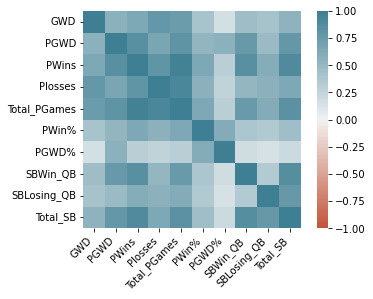

In [24]:
#exploring relationships with seaborn heatmap
corr = QBanalysis.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [25]:
#standard correlation method
QBanalysis.corr()

,GWD,PGWD,PWins,Plosses,Total_PGames,PWin%,PGWD%,SBWin_QB,SBLosing_QB,Total_SB
GWD,1.000000,0.556241,0.644528,0.787121,0.737883,0.399710,0.162117,0.466831,0.419341,0.541739
PGWD,0.556241,1.000000,0.853529,0.651573,0.813874,0.517824,0.554800,0.759969,0.482378,0.774474
PWins,0.644528,0.853529,1.000000,0.797179,0.967660,0.638388,0.305321,0.844873,0.590668,0.890181
Plosses,0.787121,0.651573,0.797179,1.000000,0.923698,0.551544,0.263602,0.515138,0.551971,0.645669
Total_PGames,0.737883,0.813874,0.967660,0.923698,1.000000,0.635556,0.303889,0.751376,0.605453,0.834666
PWin%,0.399710,0.517824,0.638388,0.551544,0.635556,1.000000,0.606584,0.384198,0.357202,0.452331
PGWD%,0.162117,0.554800,0.305321,0.263602,0.303889,0.606584,1.000000,0.181774,0.145130,0.201204
SBWin_QB,0.466831,0.759969,0.844873,0.515138,0.751376,0.384198,0.181774,1.000000,0.345780,0.864078
SBLosing_QB,0.419341,0.482378,0.590668,0.551971,0.605453,0.357202,0.145130,0.345780,1.000000,0.771090
Total_SB,0.541739,0.774474,0.890181,0.645669,0.834666,0.452331,0.201204,0.864078,0.771090,1.000000
